<a href="https://colab.research.google.com/github/Antoni-Pietryga/machine-learning-bootcamp/blob/master/supervised/03_basics/04_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.datasets import load_iris

sns.set(font_scale=1.3)
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ','_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}') 

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


#Eksploracja danych

In [3]:
Image(url="https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg", width=200)

In [4]:
Image(url="https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg", width=200)

In [5]:
Image(url="https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg", width=200)

In [6]:
df = pd.DataFrame(data=np.c_[data,target], columns=feature_names + ['target'])
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


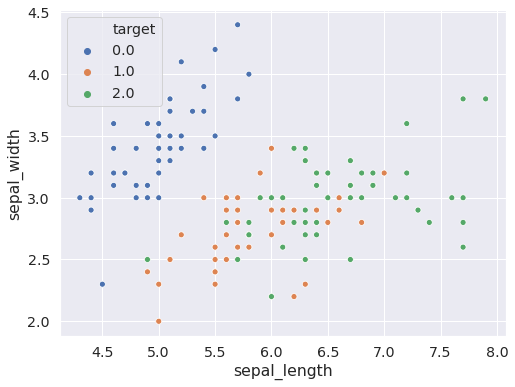

In [7]:
plt.figure(figsize=(8,6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

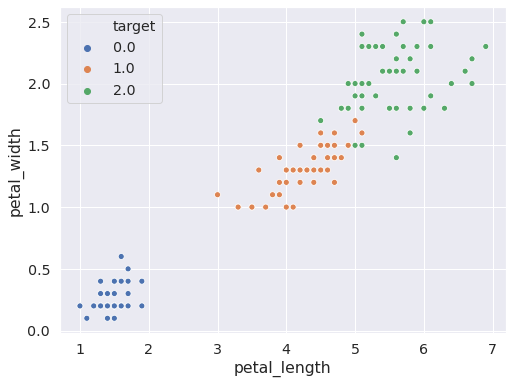

In [8]:
plt.figure(figsize=(8,6))
_ = sns.scatterplot('petal_length', 'petal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [9]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

#Przygotowanie danych do modelu 

In [10]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [11]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [0]:
data = data.values
target = target.values.astype('int16')

#Budowa klasyfikatora drzewa decyzyjnego max_depth = 1

In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1,random_state=42)
classifier.fit(data,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Wykreślenie granic decyzyjnych

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


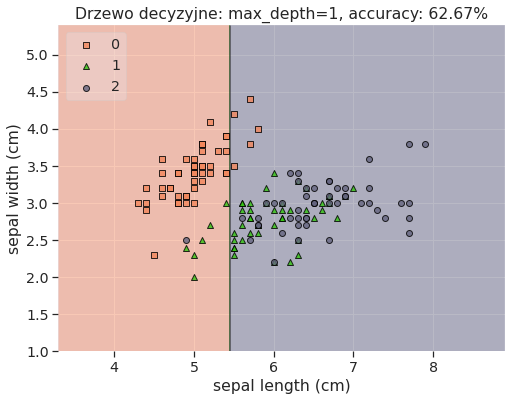

In [14]:
from mlxtend.plotting import plot_decision_regions

colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e337c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data,target)

plt.figure(figsize=(8,6))
plot_decision_regions(data,target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

#Graf drzewa decyzyjnego

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


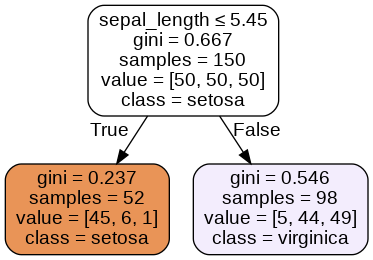

In [15]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=300)

#Budowa funkcji dla modelu drzewa decyzyjnego

In [0]:
def make_decision_tree(max_depth=1):
    #trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(data, target)

    # eksport grafu drzewa

    dot_data = StringIO()
    export_graphviz(classifier,
                  out_file=dot_data,
                  feature_names=feature_names[:2],
                  class_names=target_names,
                  special_characters=True,
                  rounded=True,
                  filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    # obliczanie dokładności
    acc = classifier.score(data,target)
    # wykreślanie granic dokładności
    colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e337c2,#7f7f7f,#bcbd22,#17becf'


    plt.figure(figsize=(8,6))
    plot_decision_regions(data,target, classifier, legend=2, colors=colors)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
  
    return Image(graph.create_png(), width=300)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


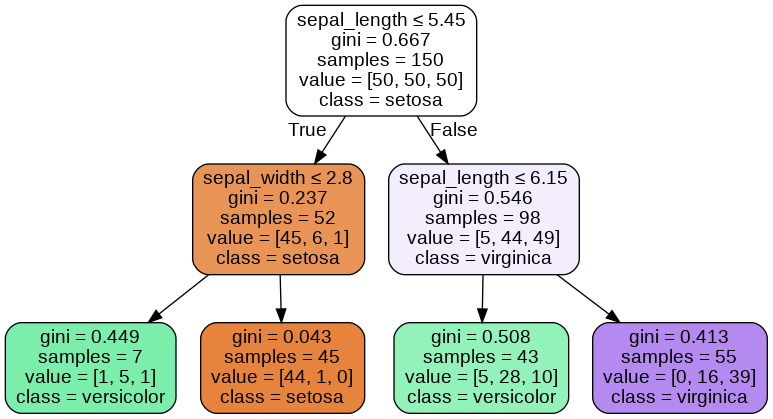

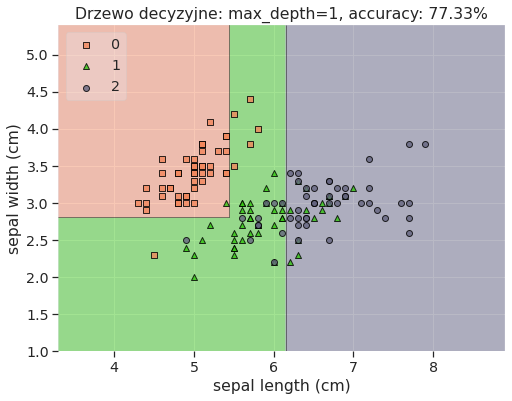

In [20]:
make_decision_tree(max_depth=2)

In [0]:
make_decision_tree(max_depth=4)

In [0]:
make_decision_tree(max_depth=5)